In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns


In [5]:
df = pd.read_csv('driver_efficiency_data.csv')
df.head()

,speed_kmh,accel_mps2,brake_%,gear,rpm,throttle_%,road_grade_%,idling_time_s,fuel_rate_Lph,E_desired_kmpl,E_actual_kmpl,delta_control,driver_score
0,72.417854,-1.017742,NaN,5.0,600.000000,42.716291,-0.258151,0.0,2.711540,17.972446,13.210420,4.762026,100.000000
1,56.543392,-0.458249,42.522346,4.0,888.087581,41.852774,-5.311876,0.0,5.876973,18.178539,15.780004,2.398536,100.000000
2,76.192213,-0.896072,16.095303,5.0,600.000000,31.673493,-4.148467,0.0,5.879121,16.528245,20.229459,-3.701214,100.000000
3,98.075746,0.165627,20.311015,5.0,756.170811,49.671837,-1.403033,0.0,1.637808,17.648537,16.172721,1.475816,NaN
4,54.146166,NaN,11.851323,4.0,600.000000,49.160241,-6.341080,0.0,3.304501,18.182674,15.880681,2.301993,98.582093


In [6]:
df.describe()

,speed_kmh,accel_mps2,brake_%,gear,rpm,throttle_%,road_grade_%,idling_time_s,fuel_rate_Lph,E_desired_kmpl,E_actual_kmpl,delta_control,driver_score
count,9232.000000,9263.000000,9201.000000,9215.000000,9178.000000,9178.000000,9195.000000,9170.000000,9220.000000,9191.000000,9185.000000,9195.000000,9234.000000
mean,60.133834,0.023968,9.792500,4.089962,663.524332,40.665406,-0.003360,0.040805,4.369329,18.005962,16.089171,1.938408,96.986600
std,24.713584,1.501357,9.795689,0.910376,103.290405,21.052865,4.034743,1.128284,2.279192,1.030761,2.214791,2.428882,4.498559
min,0.097943,-5.784563,0.000055,1.000000,600.000000,0.000000,-12.000000,0.000000,0.500000,14.520069,7.931239,-7.060375,71.799125
25%,43.228920,-0.989192,2.805161,4.000000,600.000000,25.845998,-2.688916,0.000000,2.720777,17.311427,14.603066,0.308374,95.083781
50%,59.854163,0.025776,6.868945,4.000000,600.000000,40.246806,0.032849,0.000000,4.302325,18.015093,16.093382,1.946806,99.951755
75%,76.790863,1.043279,13.453689,5.000000,703.957598,54.957610,2.727151,0.000000,5.918866,18.712609,17.605450,3.549278,100.000000
max,158.155943,6.718626,84.654161,6.000000,1232.851082,100.000000,12.000000,50.347354,14.171839,21.646778,24.386508,11.429022,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   speed_kmh       9232 non-null   float64
 1   accel_mps2      9263 non-null   float64
 2   brake_%         9201 non-null   float64
 3   gear            9215 non-null   float64
 4   rpm             9178 non-null   float64
 5   throttle_%      9178 non-null   float64
 6   road_grade_%    9195 non-null   float64
 7   idling_time_s   9170 non-null   float64
 8   fuel_rate_Lph   9220 non-null   float64
 9   E_desired_kmpl  9191 non-null   float64
 10  E_actual_kmpl   9185 non-null   float64
 11  delta_control   9195 non-null   float64
 12  driver_score    9234 non-null   float64
dtypes: float64(13)
memory usage: 1015.8 KB


In [9]:
df.shape

(10000, 13)

In [10]:
df.columns

Index(['speed_kmh', 'accel_mps2', 'brake_%', 'gear', 'rpm', 'throttle_%',
       'road_grade_%', 'idling_time_s', 'fuel_rate_Lph', 'E_desired_kmpl',
       'E_actual_kmpl', 'delta_control', 'driver_score'],
      dtype='object')

In [8]:
df.isnull().sum()

speed_kmh         768
accel_mps2        737
brake_%           799
gear              785
rpm               822
throttle_%        822
road_grade_%      805
idling_time_s     830
fuel_rate_Lph     780
E_desired_kmpl    809
E_actual_kmpl     815
delta_control     805
driver_score      766
dtype: int64

In [11]:
# Msiing value percentage
print("Missing value percentage:")
print(df.isnull().sum()/len(df)*100)

Missing value percentage:
speed_kmh         7.68
accel_mps2        7.37
brake_%           7.99
gear              7.85
rpm               8.22
throttle_%        8.22
road_grade_%      8.05
idling_time_s     8.30
fuel_rate_Lph     7.80
E_desired_kmpl    8.09
E_actual_kmpl     8.15
delta_control     8.05
driver_score      7.66
dtype: float64


In [12]:
print("\nRows with ANY missing value:", df.isnull().any(axis=1).sum())


Rows with ANY missing value: 6591


## Handling Missing Values

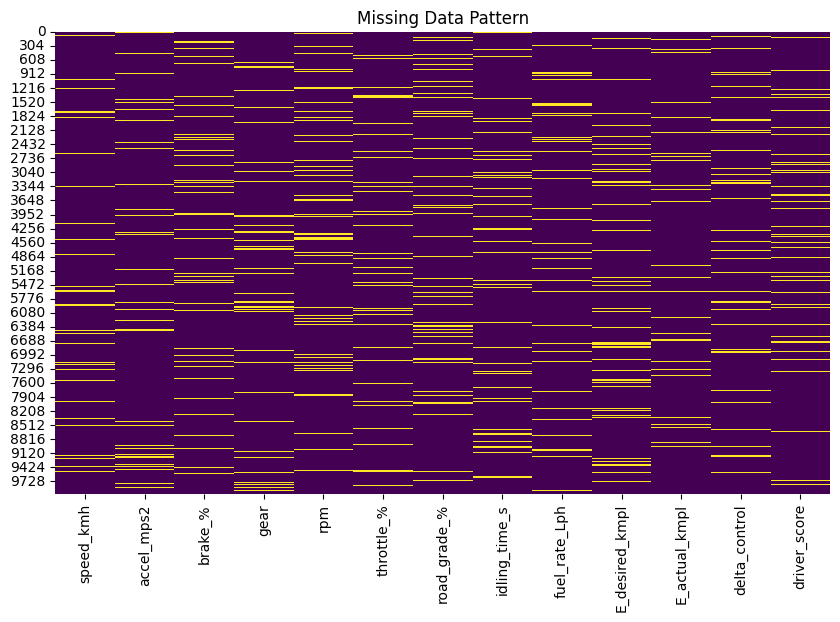

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title('Missing Data Pattern')
plt.show()

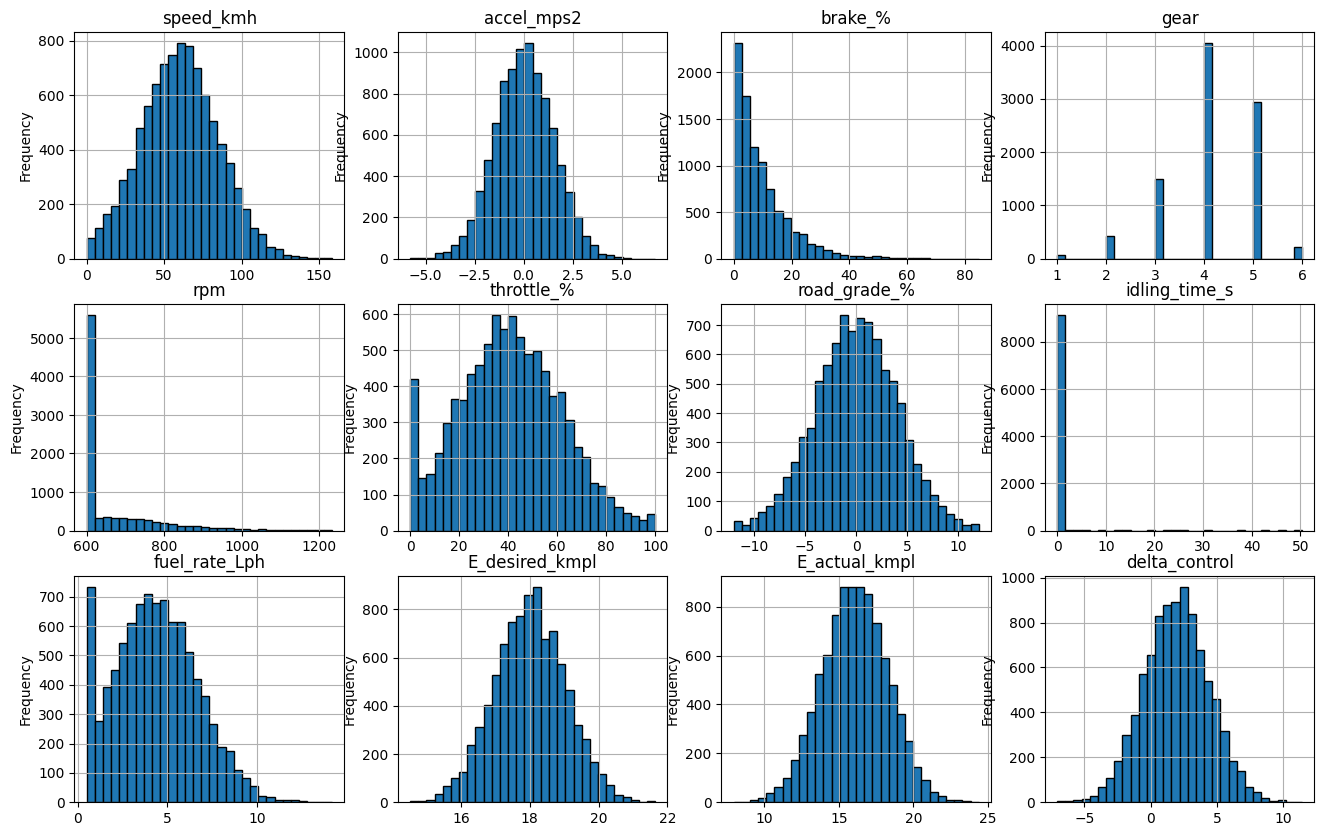

In [18]:
# check distributions of key features ( with missing valuees)
fig , axes = plt.subplots(3,4,figsize=(16,10))
axes =  axes.flatten()

columns = df.columns
columns = columns[0:12]

for i , col in enumerate(columns):
    
    df[col].dropna().hist(bins=30,ax=axes[i],edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')


plt.show()


In [29]:
# Box plot analysis
for i, col in enumerate(columns):
    axes[i].boxplot(df[col].dropna(),vert=True)
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")

plt.show()

In [26]:
# Outlier Detection using 1.5*IQR rule
for col in df.select_dtypes(include=['float64','int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outliers = df[(df[col]< lower) | (df[col]> upper)][col]

    if (len(outliers))>0:
        print(f"{col}: {len(outliers)} outliers ")
        print(f" Range: [{lower:.2f}, {upper:.2f}]")
        print(f" Outlier range : [{outliers.min():.2f}, {outliers.max():.2f}]")

speed_kmh: 36 outliers 
 Range: [-7.11, 127.13]
 Outlier range : [127.33, 158.16]
accel_mps2: 77 outliers 
 Range: [-4.04, 4.09]
 Outlier range : [-5.78, 6.72]
brake_%: 447 outliers 
 Range: [-13.17, 29.43]
 Outlier range : [29.43, 84.65]
gear: 497 outliers 
 Range: [2.50, 6.50]
 Outlier range : [1.00, 2.00]
rpm: 637 outliers 
 Range: [444.06, 859.89]
 Outlier range : [860.00, 1232.85]
throttle_%: 38 outliers 
 Range: [-17.82, 98.63]
 Outlier range : [98.72, 100.00]
road_grade_%: 63 outliers 
 Range: [-10.81, 10.85]
 Outlier range : [-12.00, 12.00]
idling_time_s: 23 outliers 
 Range: [0.00, 0.00]
 Outlier range : [0.09, 50.35]
fuel_rate_Lph: 35 outliers 
 Range: [-2.08, 10.72]
 Outlier range : [10.74, 14.17]
E_desired_kmpl: 39 outliers 
 Range: [15.21, 20.81]
 Outlier range : [14.52, 21.65]
E_actual_kmpl: 64 outliers 
 Range: [10.10, 22.11]
 Outlier range : [7.93, 24.39]
delta_control: 66 outliers 
 Range: [-4.55, 8.41]
 Outlier range : [-7.06, 11.43]
driver_score: 509 outliers 
 Range

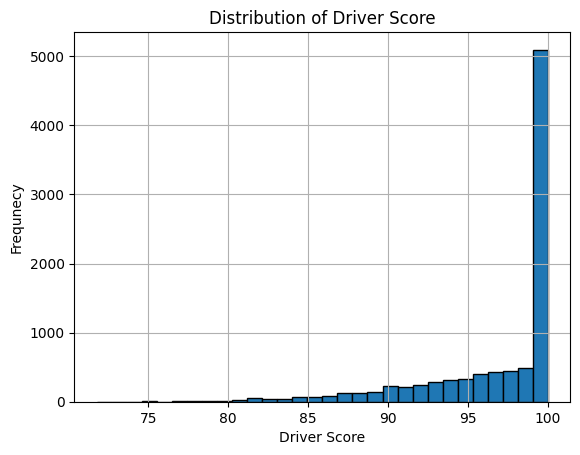

In [28]:
df['driver_score'].dropna().hist(bins=30,edgecolor='black')
plt.title("Distribution of Driver Score")
plt.xlabel("Driver Score")
plt.ylabel("Frequnecy")
plt.show()

In [ ]:
import warnings


In [32]:
# HANDLE MISSING VALUES
continuous_cols = ['speed_kmh', 'accel_mps2', 'brake_%', 'throttle_%', 
                   'rpm', 'road_grade_%', 'fuel_rate_Lph', 
                   'E_desired_kmpl', 'E_actual_kmpl', 'delta_control']
# Interpolate
for col in continuous_cols:
    df[col] = df[col].interpolate(method='linear', limit_direction='both')

# Gear
df['gear'] = df['gear'].ffill().bfill().fillna(4)


# Idling
df['idling_time_s'] = df['idling_time_s'].fillna(0)

# Final median fill for any stragglers
df[continuous_cols] = df[continuous_cols].fillna(df[continuous_cols].median())

# Drop rows where target is missing
df = df.dropna(subset=['driver_score'])

print(f"After imputation shape: {df.shape}")
print(f"Remaining missing values:\n{df.isnull().sum()}\n")

# 2. CAP EXTREME OUTLIERS (sensor errors only)
df['speed_kmh'] = df['speed_kmh'].clip(upper=130)
df['rpm'] = df['rpm'].clip(upper=1250)
fuel_99 = df['fuel_rate_Lph'].quantile(0.99)
df['fuel_rate_Lph'] = df['fuel_rate_Lph'].clip(upper=fuel_99)

#  KEEP behavioral outliers (DO NOT remove aggressive driving events)

print("Preprocessing complete!")
print(f"Final shape: {df.shape}")

After imputation shape: (9234, 13)
Remaining missing values:
speed_kmh         0
accel_mps2        0
brake_%           0
gear              0
rpm               0
throttle_%        0
road_grade_%      0
idling_time_s     0
fuel_rate_Lph     0
E_desired_kmpl    0
E_actual_kmpl     0
delta_control     0
driver_score      0
dtype: int64

Preprocessing complete!
Final shape: (9234, 13)


In [34]:
print(df.describe())
print(f"Driver score range: {df['driver_score'].min()} to {df['driver_score'].max()}")

         speed_kmh   accel_mps2      brake_%         gear          rpm  \
count  9234.000000  9234.000000  9234.000000  9234.000000  9234.000000   
mean     60.172344     0.029513     9.852979     4.090643   663.279753   
std      24.222943     1.475642     9.653082     0.906619   101.124129   
min       0.097943    -5.784563     0.000055     1.000000   600.000000   
25%      43.678285    -0.952790     2.978544     4.000000   600.000000   
50%      59.958302     0.028858     7.003271     4.000000   600.000000   
75%      76.379293     1.032361    13.503013     5.000000   702.271326   
max     130.000000     6.718626    84.654161     6.000000  1232.851082   

        throttle_%  road_grade_%  idling_time_s  fuel_rate_Lph  \
count  9234.000000   9234.000000    9234.000000    9234.000000   
mean     40.756645     -0.002566       0.031155       4.354538   
std      20.588931      3.948514       0.989818       2.208015   
min       0.000000    -12.000000       0.000000       0.500000   
25%

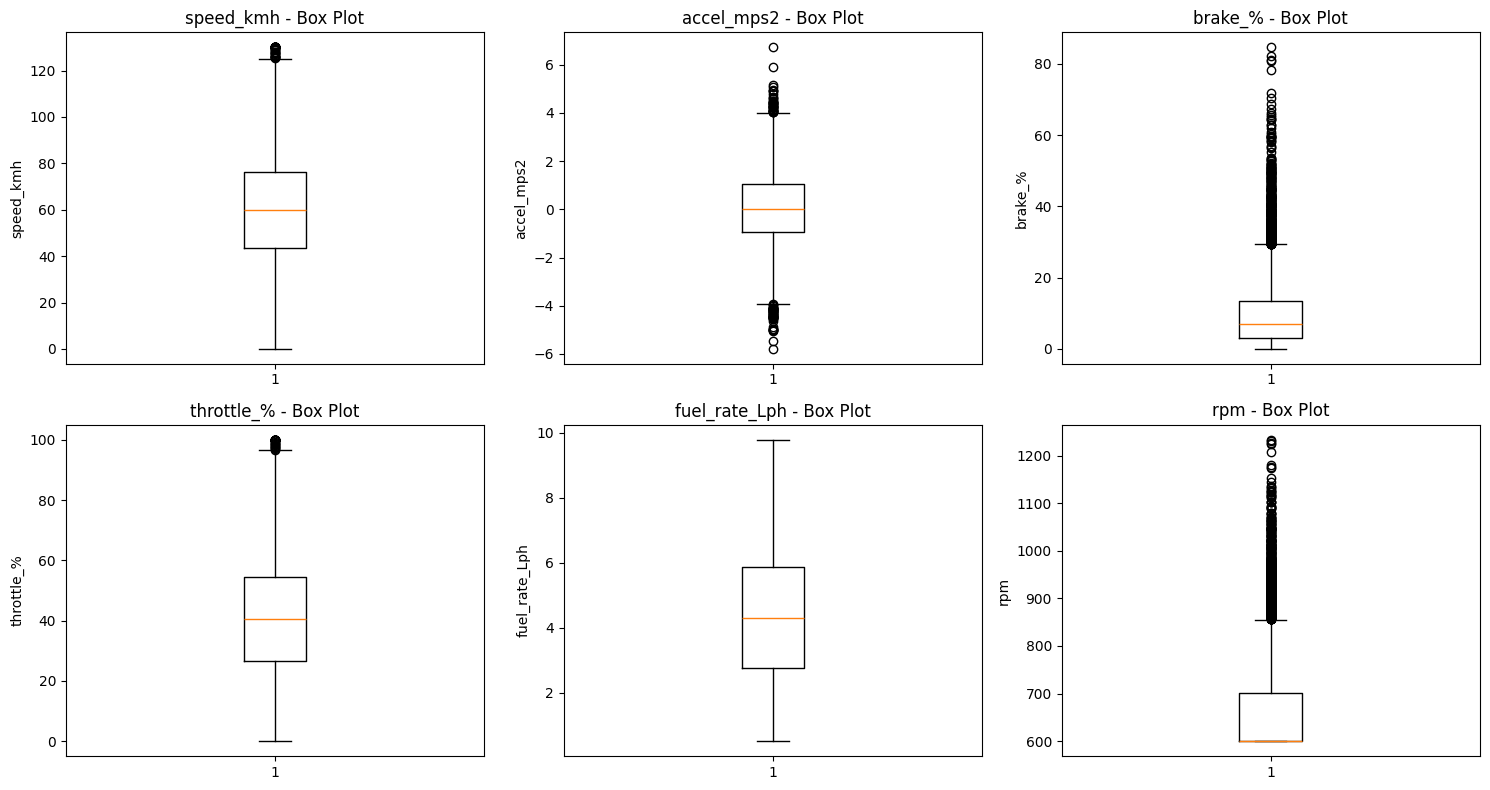

In [35]:
# Box plots for key continuous features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
features = ['speed_kmh', 'accel_mps2', 'brake_%', 'throttle_%', 'fuel_rate_Lph', 'rpm']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    axes[row, col].boxplot(df[feature].dropna(), vert=True)
    axes[row, col].set_title(f'{feature} - Box Plot')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

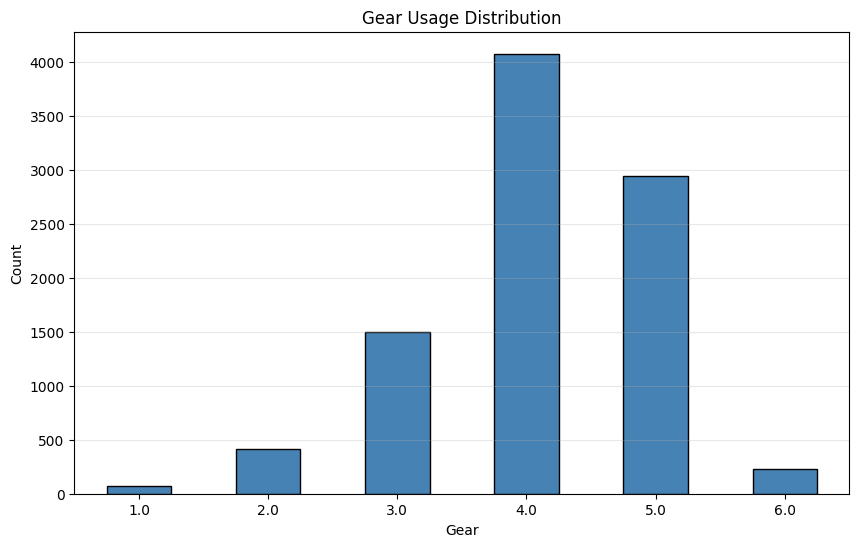

In [37]:
#Bar chart
gear_counts = df['gear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
gear_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Gear Usage Distribution')
plt.xlabel('Gear')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

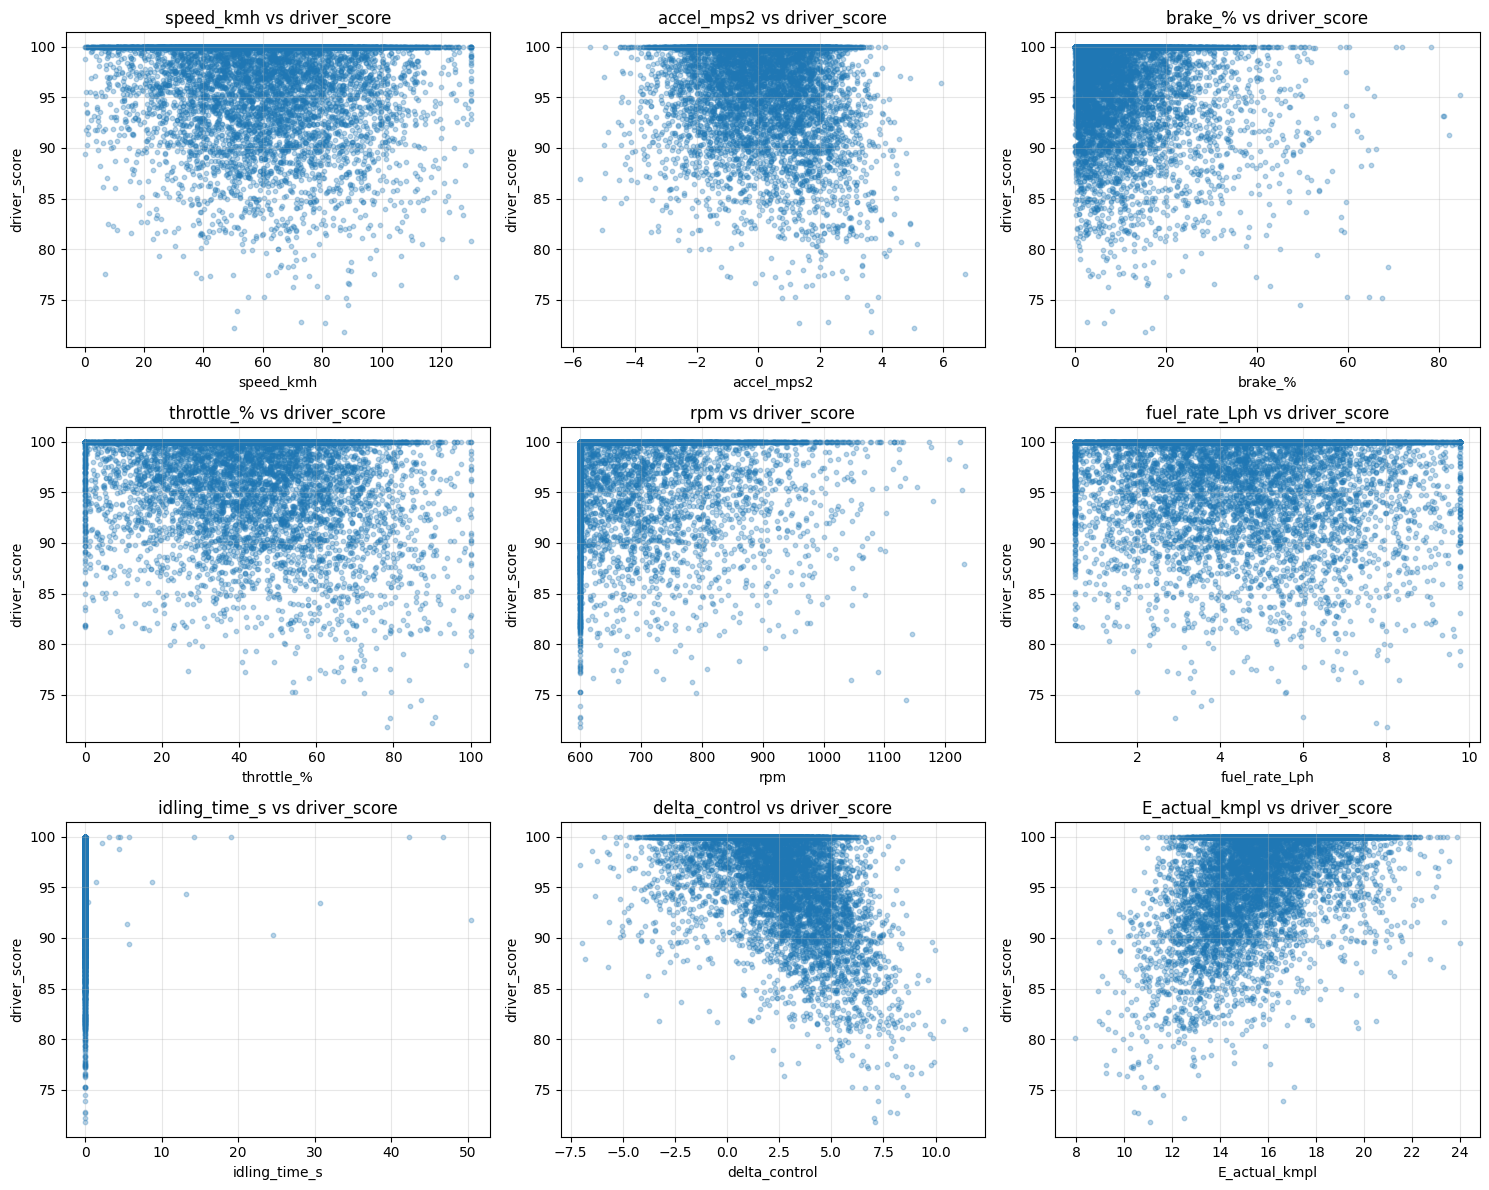

In [38]:
# Key features vs driver_score
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = ['speed_kmh', 'accel_mps2', 'brake_%', 'throttle_%', 
            'rpm', 'fuel_rate_Lph', 'idling_time_s', 'delta_control', 'E_actual_kmpl']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    axes[row, col].scatter(df[feature], df['driver_score'], alpha=0.3, s=10)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('driver_score')
    axes[row, col].set_title(f'{feature} vs driver_score')
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

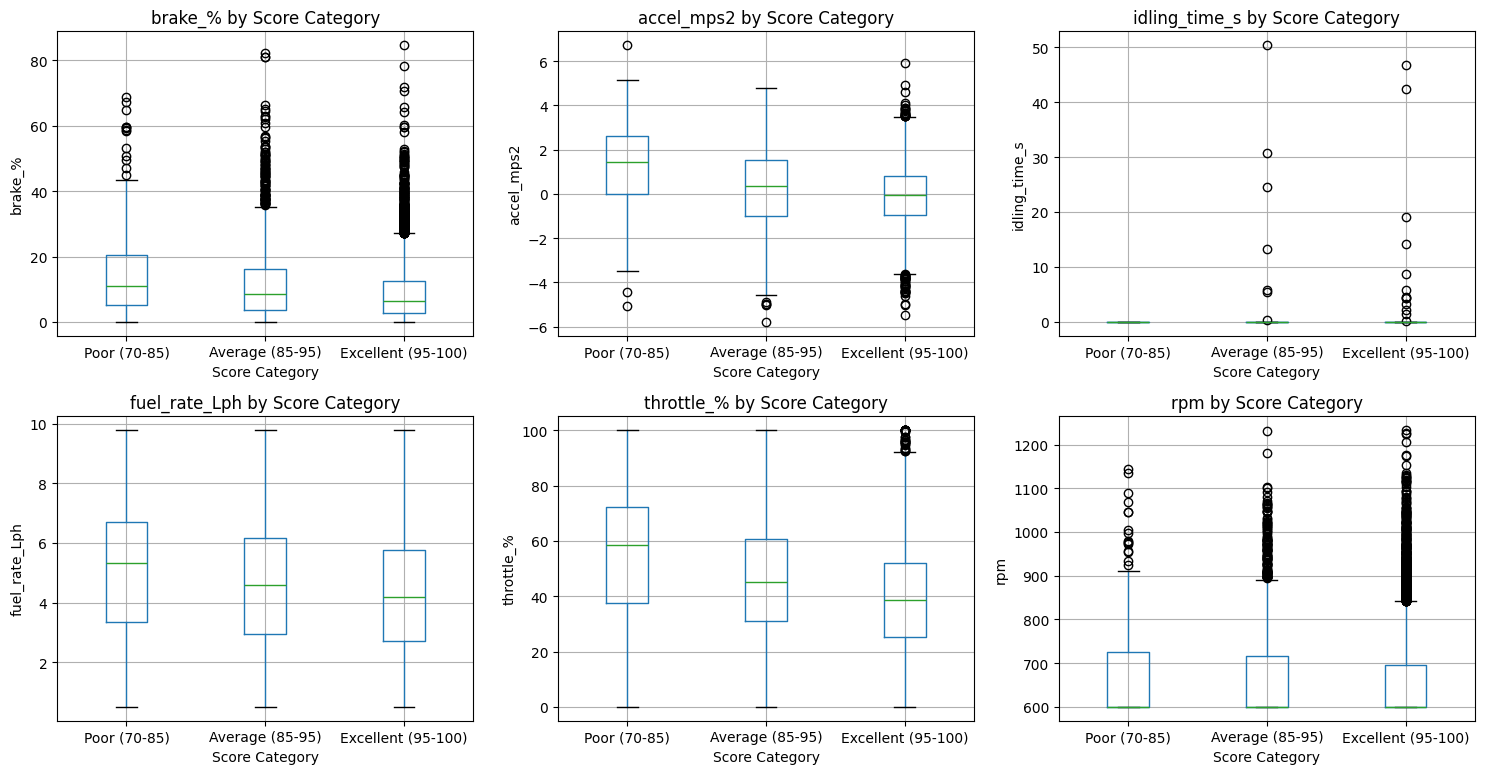

In [39]:
# Bin driver_score into categories
df['score_bin'] = pd.cut(df['driver_score'], bins=[70, 85, 95, 100], 
                          labels=['Poor (70-85)', 'Average (85-95)', 'Excellent (95-100)'])

# Box plots: How do features differ across score bins?
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
features = ['brake_%', 'accel_mps2', 'idling_time_s', 'fuel_rate_Lph', 'throttle_%', 'rpm']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    df.boxplot(column=feature, by='score_bin', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Score Category')
    axes[row, col].set_xlabel('Score Category')
    axes[row, col].set_ylabel(feature)

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

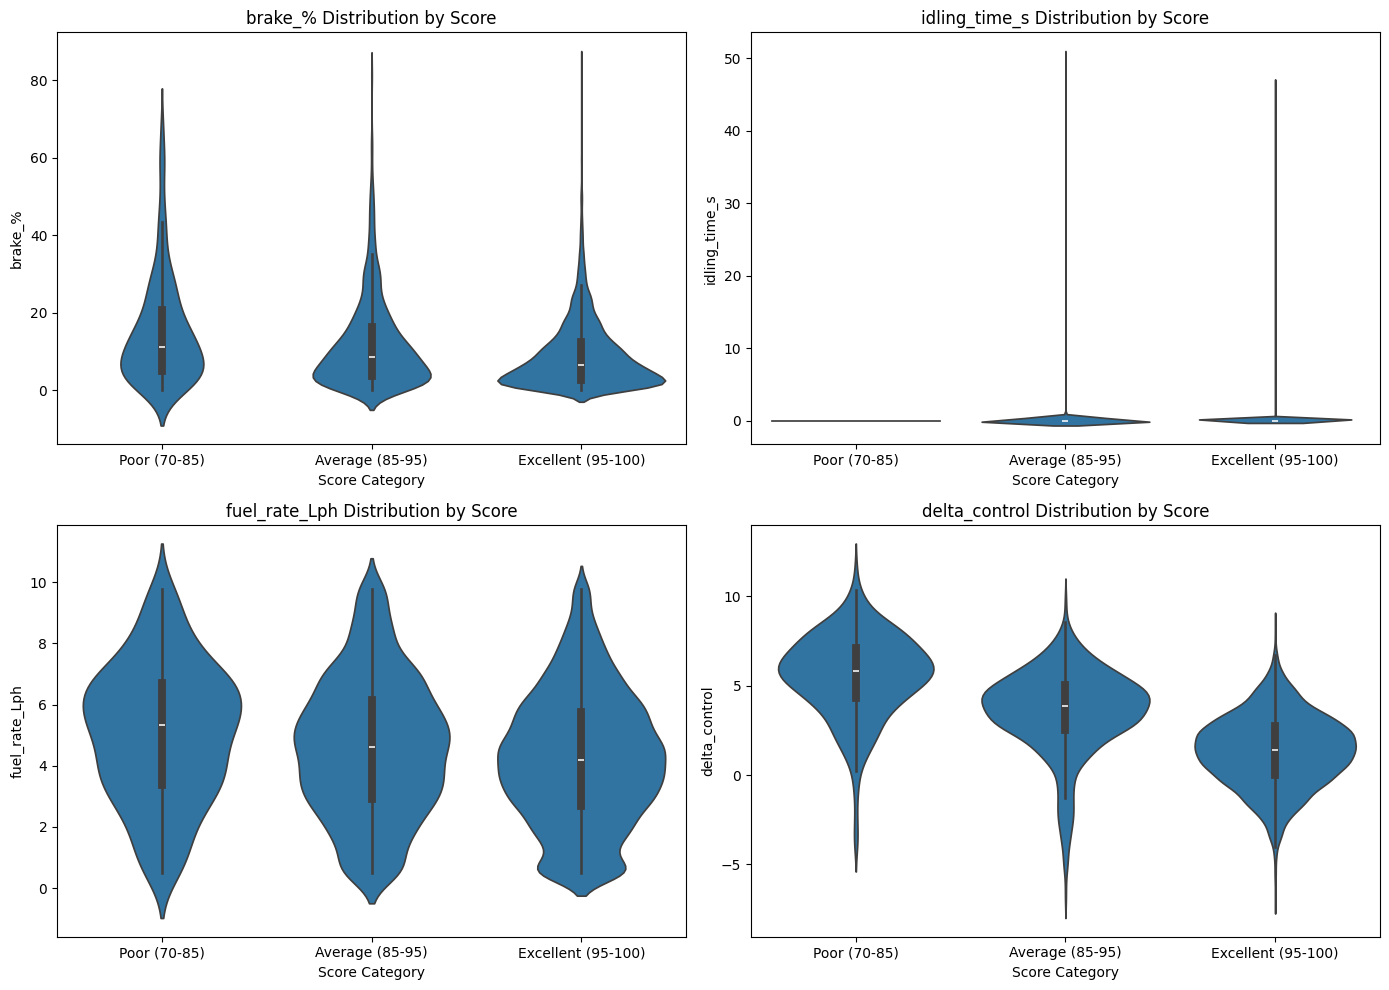

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = ['brake_%', 'idling_time_s', 'fuel_rate_Lph', 'delta_control']

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.violinplot(x='score_bin', y=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution by Score')
    axes[row, col].set_xlabel('Score Category')

plt.tight_layout()
plt.show()

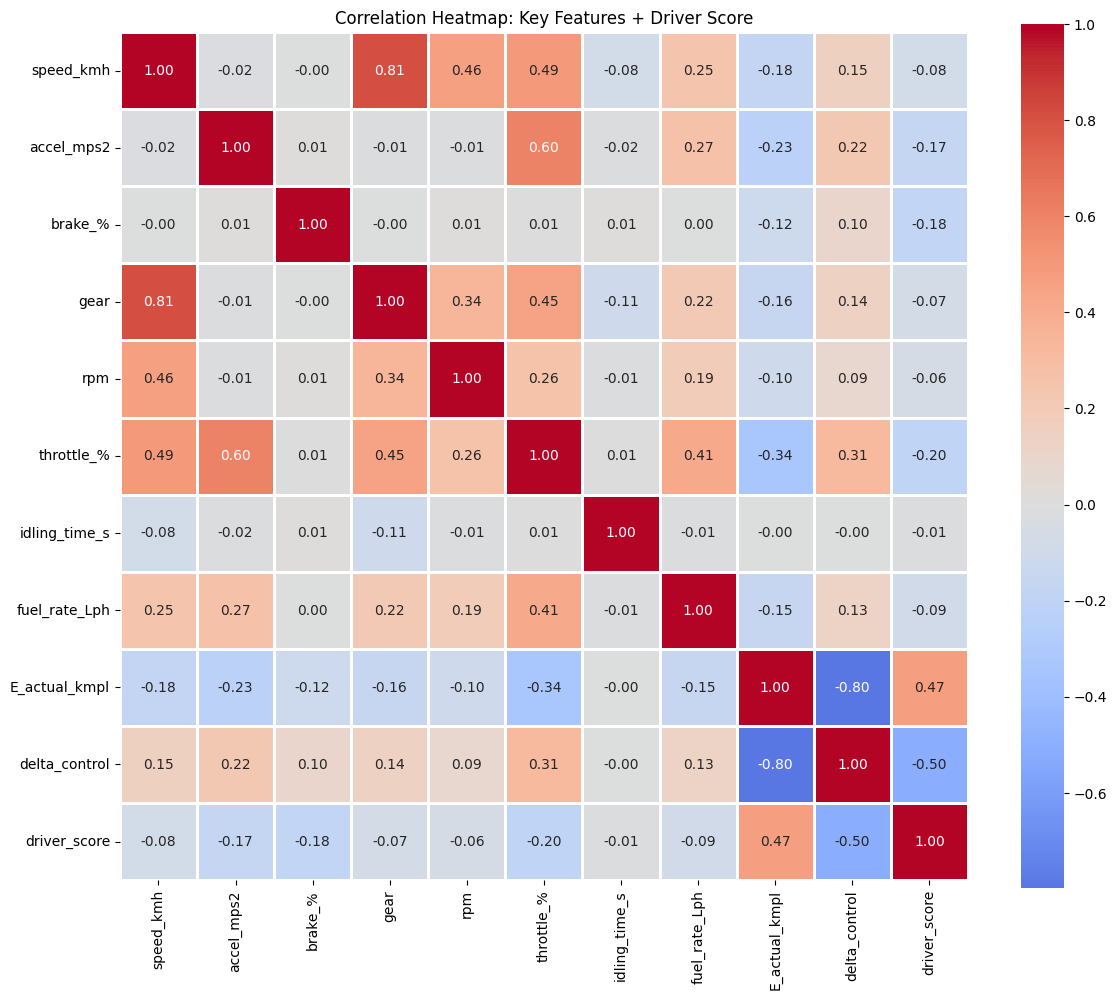


Correlations with driver_score:
driver_score     1.000000
E_actual_kmpl    0.472865
idling_time_s   -0.005510
rpm             -0.056823
gear            -0.072500
speed_kmh       -0.075302
fuel_rate_Lph   -0.090957
accel_mps2      -0.169769
brake_%         -0.181911
throttle_%      -0.198653
delta_control   -0.504469
Name: driver_score, dtype: float64


In [41]:
# Select key features for cleaner visualization
key_features = ['speed_kmh', 'accel_mps2', 'brake_%', 'gear', 'rpm', 
                'throttle_%', 'idling_time_s', 'fuel_rate_Lph', 
                'E_actual_kmpl', 'delta_control', 'driver_score']

plt.figure(figsize=(12, 10))
corr_matrix = df[key_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap: Key Features + Driver Score')
plt.tight_layout()
plt.show()

# Print top correlations with driver_score
print("\nCorrelations with driver_score:")
print(corr_matrix['driver_score'].sort_values(ascending=False))

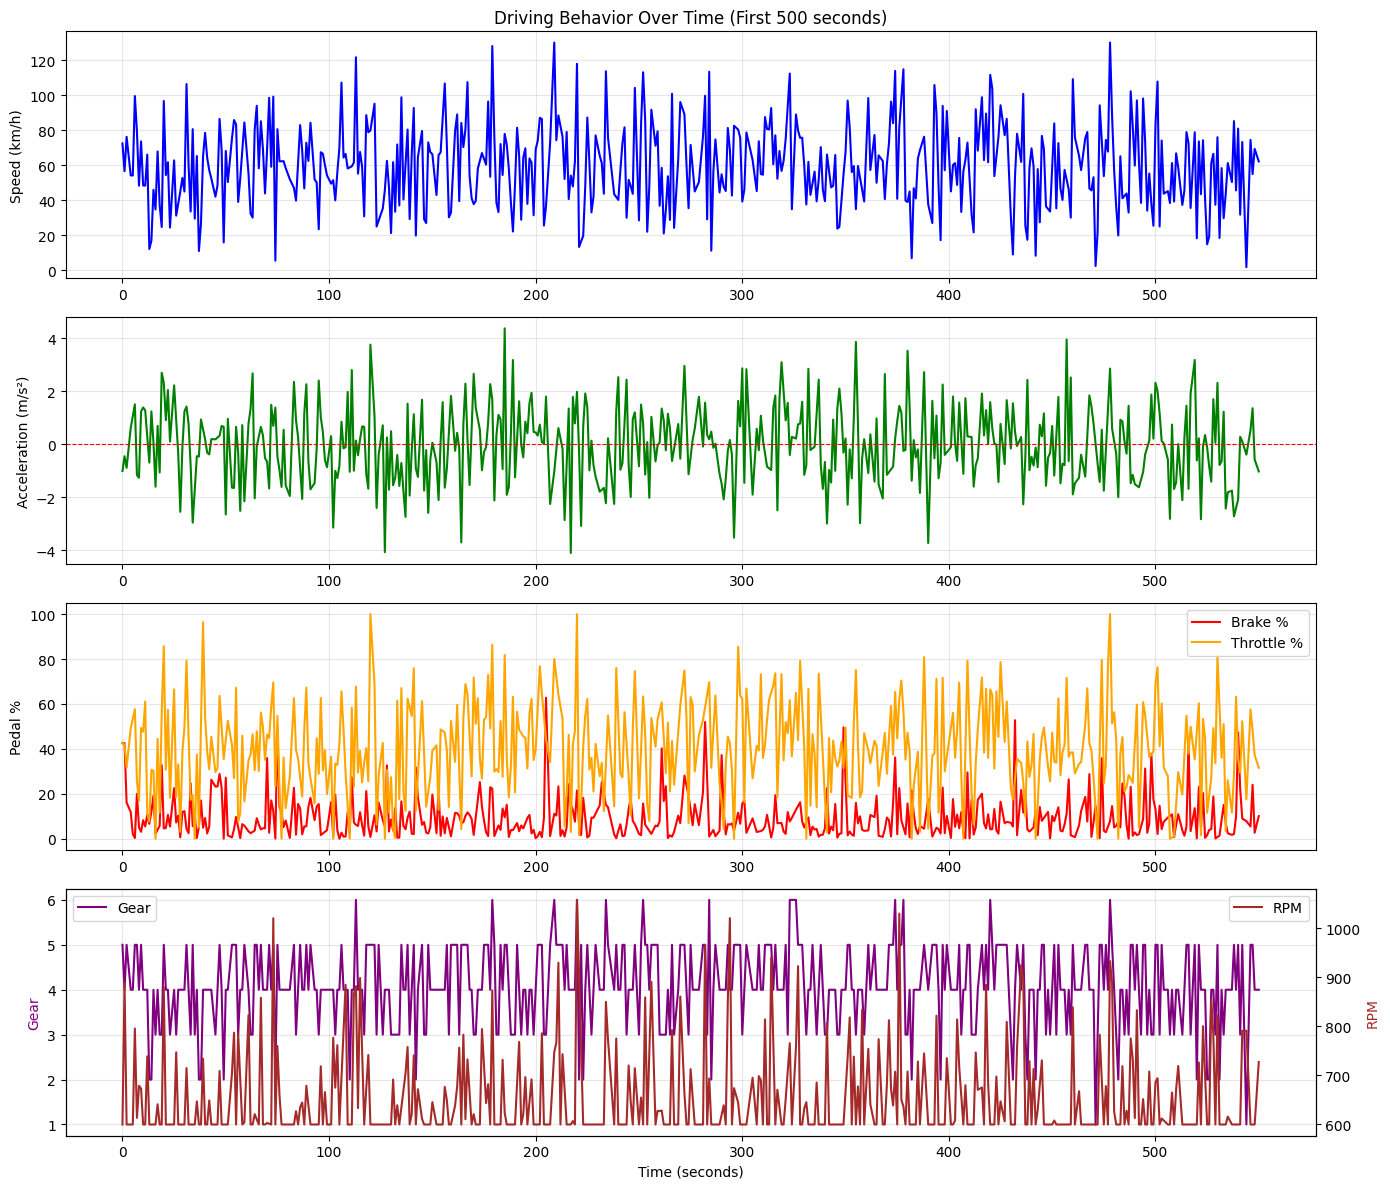

In [42]:
# Plot first 500 rows (a "trip segment")
sample_rows = df.head(500)

fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Speed over time
axes[0].plot(sample_rows.index, sample_rows['speed_kmh'], color='blue')
axes[0].set_ylabel('Speed (km/h)')
axes[0].set_title('Driving Behavior Over Time (First 500 seconds)')
axes[0].grid(alpha=0.3)

# Acceleration over time
axes[1].plot(sample_rows.index, sample_rows['accel_mps2'], color='green')
axes[1].axhline(0, color='red', linestyle='--', linewidth=0.8)
axes[1].set_ylabel('Acceleration (m/s²)')
axes[1].grid(alpha=0.3)

# Brake and throttle
axes[2].plot(sample_rows.index, sample_rows['brake_%'], label='Brake %', color='red')
axes[2].plot(sample_rows.index, sample_rows['throttle_%'], label='Throttle %', color='orange')
axes[2].set_ylabel('Pedal %')
axes[2].legend()
axes[2].grid(alpha=0.3)

# Gear and RPM
ax3_twin = axes[3].twinx()
axes[3].plot(sample_rows.index, sample_rows['gear'], color='purple', label='Gear')
ax3_twin.plot(sample_rows.index, sample_rows['rpm'], color='brown', label='RPM')
axes[3].set_ylabel('Gear', color='purple')
ax3_twin.set_ylabel('RPM', color='brown')
axes[3].set_xlabel('Time (seconds)')
axes[3].legend(loc='upper left')
ax3_twin.legend(loc='upper right')
axes[3].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Engineering

In [46]:
# Jerk = d(acceleration)/dt
# High jerk = sudden movements = bad driving
df['jerk_mps3'] = df['accel_mps2'].diff()  # Change in accel per second

# Absolute jerk (magnitude of jerkiness)
df['jerk_abs'] = df['jerk_mps3'].abs()

window = 5

# Speed variability (how much speed fluctuates)
df['speed_rolling_mean'] = df['speed_kmh'].rolling(window=window, min_periods=1).mean()
df['speed_rolling_std'] = df['speed_kmh'].rolling(window=window, min_periods=1).std()

# Acceleration smoothness
df['accel_rolling_std'] = df['accel_mps2'].rolling(window=window, min_periods=1).std()

# Brake smoothness
df['brake_rolling_mean'] = df['brake_%'].rolling(window=window, min_periods=1).mean()
df['brake_rolling_std'] = df['brake_%'].rolling(window=window, min_periods=1).std()

# Throttle smoothness
df['throttle_rolling_std'] = df['throttle_%'].rolling(window=window, min_periods=1).std()

# Fill NaNs from rolling operations
rolling_cols = [col for col in df.columns if 'rolling' in col]
df[rolling_cols] = df[rolling_cols].bfill()

In [47]:
# Harsh braking (brake > 30%)
df['harsh_brake'] = (df['brake_%'] > 30).astype(int)

# Harsh acceleration (accel > 3 m/s²)
df['harsh_accel'] = (df['accel_mps2'] > 3).astype(int)

# Harsh deceleration (accel < -3 m/s²)
df['harsh_decel'] = (df['accel_mps2'] < -3).astype(int)

# Full throttle usage (throttle = 100%)
df['full_throttle'] = (df['throttle_%'] >= 99).astype(int)

# Excessive idling (> 5 seconds)
df['excessive_idle'] = (df['idling_time_s'] > 5).astype(int)

# Speeding indicator (> 100 km/h, adjust based on your speed limits)
df['speeding'] = (df['speed_kmh'] > 100).astype(int)


# Count how many aggressive events in last N seconds
window_agg = 10  # 10-second window

df['harsh_brake_count_10s'] = df['harsh_brake'].rolling(window=window_agg, min_periods=1).sum()
df['harsh_accel_count_10s'] = df['harsh_accel'].rolling(window=window_agg, min_periods=1).sum()
df['aggressive_events_10s'] = (df['harsh_brake_count_10s'] + 
                                 df['harsh_accel_count_10s'] + 
                                 df['harsh_decel'].rolling(window=window_agg, min_periods=1).sum())

In [48]:


# Efficiency gap 
df['efficiency_ratio'] = df['E_actual_kmpl'] / df['E_desired_kmpl']
# Ratio < 1 = worse than ideal
# Ratio > 1 = better than ideal



# Fuel waste rate 
df['fuel_per_distance'] = df['fuel_rate_Lph'] / (df['speed_kmh'] + 0.1)  # +0.1 to avoid div by zero
# High value = burning lots of fuel for little movement


# High RPM in low gear = revving engine unnecessarily
df['rpm_per_gear'] = df['rpm'] / (df['gear'] + 1)
# High value = poor gear selection

# RPM efficiency zone (diesel engines are efficient at 1500-2500 RPM for gas, 600-900 for diesel)
# Assuming this is diesel based on your RPM range (600-1232)
df['rpm_in_efficient_zone'] = ((df['rpm'] >= 600) & (df['rpm'] <= 900)).astype(int)

# RPM too high for speed (over-revving)
# Rough heuristic: RPM should correlate with speed
df['rpm_speed_ratio'] = df['rpm'] / (df['speed_kmh'] + 1)

In [49]:

def ideal_gear(speed):
    if speed < 20:
        return 1
    elif speed < 40:
        return 2
    elif speed < 60:
        return 3
    elif speed < 80:
        return 4
    elif speed < 100:
        return 5
    else:
        return 6

df['ideal_gear'] = df['speed_kmh'].apply(ideal_gear)
df['gear_mismatch'] = (df['gear'] - df['ideal_gear']).abs()

In [50]:
# Speed × brake (high-speed braking is more dangerous)
df['speed_brake_interaction'] = df['speed_kmh'] * df['brake_%']

# RPM × throttle (high RPM + high throttle = aggressive)
df['rpm_throttle_interaction'] = df['rpm'] * df['throttle_%']

# Idling × fuel rate (idling while burning fuel = pure waste)
df['idle_fuel_waste'] = df['idling_time_s'] * df['fuel_rate_Lph']

In [51]:
# Road adjustments
df['uphill'] = (df['road_grade_%'] > 2).astype(int)
df['downhill'] = (df['road_grade_%'] < -2).astype(int)
df['throttle_grade_interaction'] = df['throttle_%'] * df['road_grade_%']
df['speed_downhill_risk'] = df['speed_kmh'] * df['downhill']

df['coasting'] = ((df['speed_kmh'] > 10) & (df['throttle_%'] < 5)).astype(int)
df['coasting_downhill'] = df['coasting'] * df['downhill']

Top 15 positively correlated features:
driver_score                  1.000000
E_actual_kmpl                 0.472865
rpm_per_gear                  0.025855
rpm_speed_ratio               0.020014
fuel_per_distance             0.002683
speed_rolling_std            -0.014328
harsh_brake_count_10s        -0.026753
speed_rolling_mean           -0.036959
brake_rolling_std            -0.055619
throttle_rolling_std         -0.055665
rpm                          -0.056823
road_grade_%                 -0.056920
aggressive_events_10s        -0.058092
brake_rolling_mean           -0.059796
throttle_grade_interaction   -0.067975
Name: driver_score, dtype: float64

Top 15 negatively correlated features:
road_grade_%                 -0.056920
aggressive_events_10s        -0.058092
brake_rolling_mean           -0.059796
throttle_grade_interaction   -0.067975
speed_kmh                    -0.075302
fuel_rate_Lph                -0.090957
accel_rolling_std            -0.106944
jerk_mps3                   

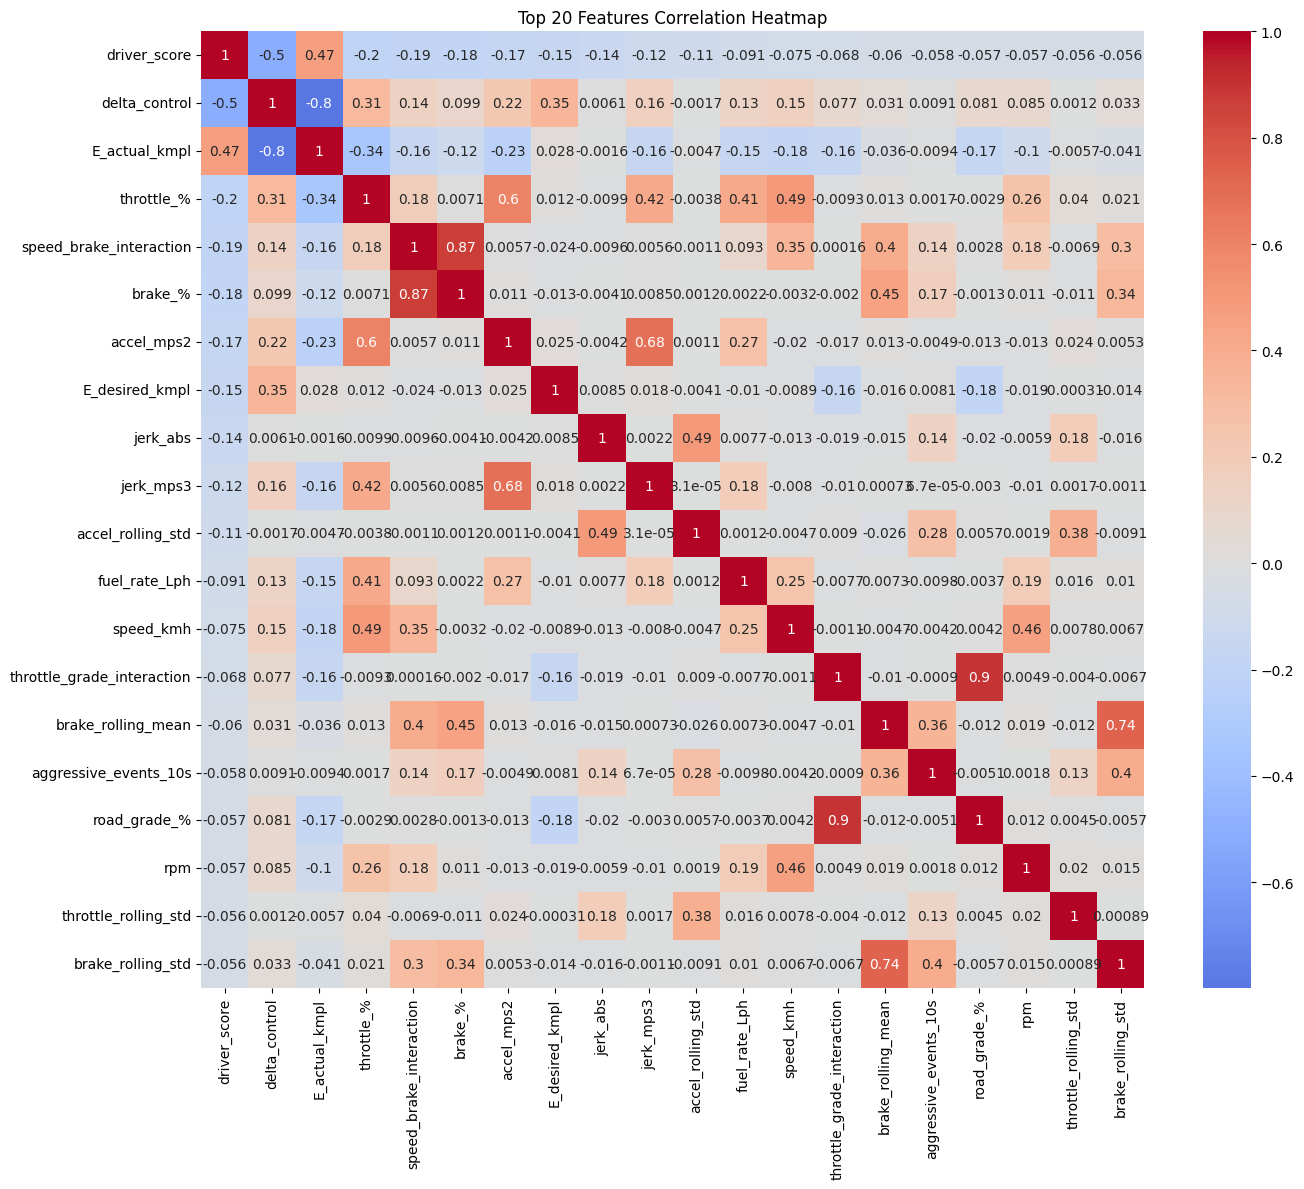

In [110]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation with driver_score
target = 'driver_score'
correlations = numeric_df.corr()[target].sort_values(ascending=False)

print("Top 15 positively correlated features:")
print(correlations.head(15))

print("\nTop 15 negatively correlated features:")
print(correlations.tail(15))

# Heatmap of top 20 absolute correlations
plt.figure(figsize=(14, 12))
top_features = correlations.abs().sort_values(ascending=False).head(20).index
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Top 20 Features Correlation Heatmap')
plt.tight_layout()
plt.show()


In [54]:
print(df.shape)
print(len(df.columns))
print(df.info())
print(df.describe())

(9234, 47)
47
<class 'pandas.core.frame.DataFrame'>
Index: 9234 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   speed_kmh                   9234 non-null   float64 
 1   accel_mps2                  9234 non-null   float64 
 2   brake_%                     9234 non-null   float64 
 3   gear                        9234 non-null   float64 
 4   rpm                         9234 non-null   float64 
 5   throttle_%                  9234 non-null   float64 
 6   road_grade_%                9234 non-null   float64 
 7   idling_time_s               9234 non-null   float64 
 8   fuel_rate_Lph               9234 non-null   float64 
 9   E_desired_kmpl              9234 non-null   float64 
 10  E_actual_kmpl               9234 non-null   float64 
 11  delta_control               9234 non-null   float64 
 12  driver_score                9234 non-null   float64 
 13  score_bin

In [55]:
print(f"% with idling: {(df['idling_time_s'] > 0).mean() * 100:.2f}%")
print(f"Mean score (idling): {df[df['idling_time_s'] > 0]['driver_score'].mean():.2f}")
print(f"Mean score (no idling): {df[df['idling_time_s'] == 0]['driver_score'].mean():.2f}")

% with idling: 0.22%
Mean score (idling): 96.67
Mean score (no idling): 96.99


## Feature Selection


In [57]:
# Separate features and target
X = df.drop(columns=['driver_score', 'score_bin'])
y = df['driver_score']

print(f"Starting with {X.shape[1]} features")

Starting with 45 features


In [58]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selector.fit(X)

low_var_features = X.columns[~selector.get_support()].tolist()
print(f"\nLow variance features to drop: {low_var_features}")

X = X.drop(columns=low_var_features)
print(f"After variance filter: {X.shape[1]} features")


Low variance features to drop: ['full_throttle', 'excessive_idle']
After variance filter: 43 features


In [59]:
corr_matrix = X.corr().abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [
    col for col in upper_triangle.columns 
    if any(upper_triangle[col] > 0.9)
]

print(f"\nHighly correlated features to drop: {to_drop}")

X = X.drop(columns=to_drop)
print(f"After correlation filter: {X.shape[1]} features")


Highly correlated features to drop: ['efficiency_ratio', 'ideal_gear', 'rpm_throttle_interaction', 'speed_downhill_risk']
After correlation filter: 39 features



Training Random Forest for feature importance...

Top 20 Features by Importance:
                       feature  importance
11               delta_control    0.403368
1                   accel_mps2    0.100302
10               E_actual_kmpl    0.056938
2                      brake_%    0.035113
16           accel_rolling_std    0.025937
15           speed_rolling_std    0.024556
19        throttle_rolling_std    0.024529
14          speed_rolling_mean    0.024397
9               E_desired_kmpl    0.024279
12                   jerk_mps3    0.023653
32     speed_brake_interaction    0.022784
5                   throttle_%    0.022680
18           brake_rolling_std    0.022072
17          brake_rolling_mean    0.021274
6                 road_grade_%    0.019448
27           fuel_per_distance    0.019283
8                fuel_rate_Lph    0.018467
30             rpm_speed_ratio    0.018128
13                    jerk_abs    0.017964
36  throttle_grade_interaction    0.017418


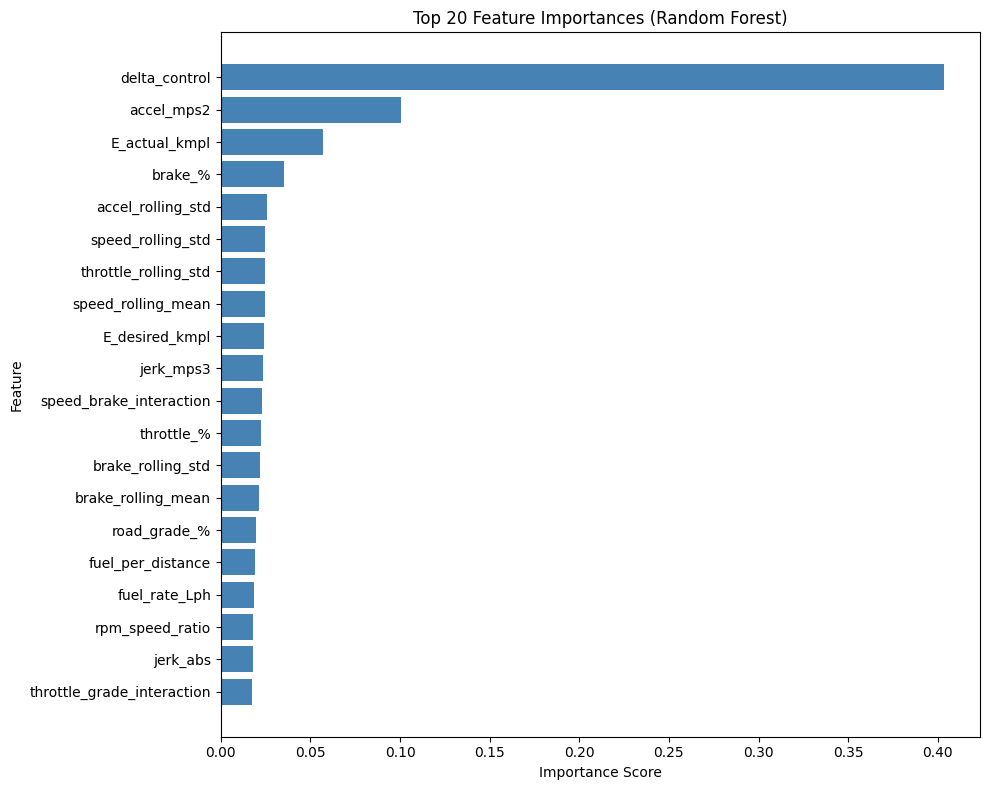

In [61]:
from sklearn.ensemble import RandomForestRegressor
print("\nTraining Random Forest for feature importance...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

importance_df = (
    pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    })
    .sort_values('importance', ascending=False)
)

print("\nTop 20 Features by Importance:")
print(importance_df.head(20))

# Plot top 20 feature importances
plt.figure(figsize=(10, 8))
top_20 = importance_df.head(20)
plt.barh(top_20['feature'], top_20['importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

In [63]:
n_features = 25
selected_features = importance_df.head(n_features)['feature'].tolist()


print(f"FINAL FEATURE SET: {len(selected_features)} features")


for i, feat in enumerate(selected_features, 1):
    importance_value = importance_df.loc[
        importance_df['feature'] == feat, 'importance'
    ].values[0]
    print(f"{i:2d}. {feat:30s} (importance: {importance_value:.4f})")

# Keep only selected features + target
X_final = df[selected_features]
y_final = df['driver_score']

final_df = pd.concat([X_final, y_final], axis=1)
final_df.to_csv('driver_data_final.csv', index=False)

print(f"\nFinal dataset saved: {final_df.shape}")


FINAL FEATURE SET: 25 features
 1. delta_control                  (importance: 0.4034)
 2. accel_mps2                     (importance: 0.1003)
 3. E_actual_kmpl                  (importance: 0.0569)
 4. brake_%                        (importance: 0.0351)
 5. accel_rolling_std              (importance: 0.0259)
 6. speed_rolling_std              (importance: 0.0246)
 7. throttle_rolling_std           (importance: 0.0245)
 8. speed_rolling_mean             (importance: 0.0244)
 9. E_desired_kmpl                 (importance: 0.0243)
10. jerk_mps3                      (importance: 0.0237)
11. speed_brake_interaction        (importance: 0.0228)
12. throttle_%                     (importance: 0.0227)
13. brake_rolling_std              (importance: 0.0221)
14. brake_rolling_mean             (importance: 0.0213)
15. road_grade_%                   (importance: 0.0194)
16. fuel_per_distance              (importance: 0.0193)
17. fuel_rate_Lph                  (importance: 0.0185)
18. rpm_speed_rat

## Model Training

In [66]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [65]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ------ --------------------------------- 11.5/72.0 MB 79.9 MB/s eta 0:00:01
   ------------------------------- -------- 56.9/72.0 MB 164.6 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 176.3 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 95.6 MB/s  0:00:00


In [67]:
df = pd.read_csv('driver_data_final.csv')
print(f"\nDataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"Target: driver_score")

# Separate features and target
X = df.drop(columns=['driver_score'])
y = df['driver_score']

print(f"\nTarget statistics:")
print(f"  Mean: {y.mean():.2f}")
print(f"  Std: {y.std():.2f}")
print(f"  Min: {y.min():.2f}")
print(f"  Max: {y.max():.2f}")


Dataset shape: (9234, 26)
Features: 25
Target: driver_score

Target statistics:
  Mean: 96.99
  Std: 4.50
  Min: 71.80
  Max: 100.00


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Train set: 7387 samples
Test set: 1847 samples


In [69]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [71]:
# Cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [73]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(7387, 25)
(1847, 25)


In [74]:
print(np.isnan(X_test_scaled).sum())      # number of NaNs
print(np.isinf(X_test_scaled).sum())      # number of infinite values


delta_control                 0
accel_mps2                    0
E_actual_kmpl                 0
brake_%                       0
accel_rolling_std             0
speed_rolling_std             0
throttle_rolling_std          0
speed_rolling_mean            0
E_desired_kmpl                0
jerk_mps3                     1
speed_brake_interaction       0
throttle_%                    0
brake_rolling_std             0
brake_rolling_mean            0
road_grade_%                  0
fuel_per_distance             0
fuel_rate_Lph                 0
rpm_speed_ratio               0
jerk_abs                      1
throttle_grade_interaction    0
speed_kmh                     0
rpm_per_gear                  0
rpm                           0
aggressive_events_10s         0
harsh_brake_count_10s         0
dtype: int64
delta_control                 0
accel_mps2                    0
E_actual_kmpl                 0
brake_%                       0
accel_rolling_std             0
speed_rolling_std          

In [84]:
print(np.isnan(X_train_scaled).sum())      # number of NaNs
print(np.isinf(X_train_scaled).sum()) 

0
0


In [77]:
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)


In [75]:
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)


In [79]:
results = {}
print("\n[1] Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

results['Linear Regression'] = {
    'model': lr,
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'test_r2': r2_score(y_test, y_pred_test),
    'predictions': y_pred_test
}



[1] Linear Regression...


In [80]:
print("[2] Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)

y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

results['Ridge'] = {
    'model': ridge,
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'test_r2': r2_score(y_test, y_pred_test),
    'predictions': y_pred_test
}

[2] Ridge Regression...


In [81]:
print("[3] Lasso Regression...")
lasso = Lasso(alpha=0.1, random_state=42, max_iter=5000)
lasso.fit(X_train_scaled, y_train)

y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

results['Lasso'] = {
    'model': lasso,
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'test_r2': r2_score(y_test, y_pred_test),
    'predictions': y_pred_test
}

[3] Lasso Regression...


In [86]:
print("[4] Random Forest...")
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

results['Random Forest'] = {
    'model': rf,
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'test_r2': r2_score(y_test, y_pred_test),
    'predictions': y_pred_test
}

[4] Random Forest...


In [87]:
print("[5] Gradient Boosting...")
gb = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
gb.fit(X_train_scaled, y_train)

y_pred_train = gb.predict(X_train_scaled)
y_pred_test = gb.predict(X_test_scaled)

results['Gradient Boosting'] = {
    'model': gb,
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'test_r2': r2_score(y_test, y_pred_test),
    'predictions': y_pred_test
}

[5] Gradient Boosting...


In [88]:
print("[6/6] XGBoost...")
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_scaled, y_train)

y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

results['XGBoost'] = {
    'model': xgb_model,
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'train_r2': r2_score(y_train, y_pred_train),
    'test_mae': mean_absolute_error(y_test, y_pred_test),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'test_r2': r2_score(y_test, y_pred_test),
    'predictions': y_pred_test
}

[6/6] XGBoost...


In [89]:
# Create comparison DataFrame
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Train MAE': [results[m]['train_mae'] for m in results],
    'Train RMSE': [results[m]['train_rmse'] for m in results],
    'Train R²': [results[m]['train_r2'] for m in results],
    'Test MAE': [results[m]['test_mae'] for m in results],
    'Test RMSE': [results[m]['test_rmse'] for m in results],
    'Test R²': [results[m]['test_r2'] for m in results]
})

comparison['Overfit Gap'] = comparison['Train R²'] - comparison['Test R²']

print("\n" + comparison.to_string(index=False))



            Model  Train MAE  Train RMSE  Train R²  Test MAE  Test RMSE  Test R²  Overfit Gap
Linear Regression   2.809137    3.726037  0.318197  2.829458   3.755731 0.284815     0.033382
            Ridge   2.809133    3.726037  0.318197  2.829452   3.755727 0.284816     0.033381
            Lasso   2.818220    3.737207  0.314103  2.833351   3.757550 0.284122     0.029981
    Random Forest   1.545531    2.160494  0.770770  2.413964   3.383175 0.419666     0.351105
Gradient Boosting   1.589877    2.200851  0.762127  2.417749   3.415874 0.408393     0.353733
          XGBoost   1.104643    1.526604  0.885550  2.422283   3.420193 0.406896     0.478653


In [90]:
best_model_name = comparison.loc[comparison['Test RMSE'].idxmin(), 'Model']
print(best_model_name)

Random Forest


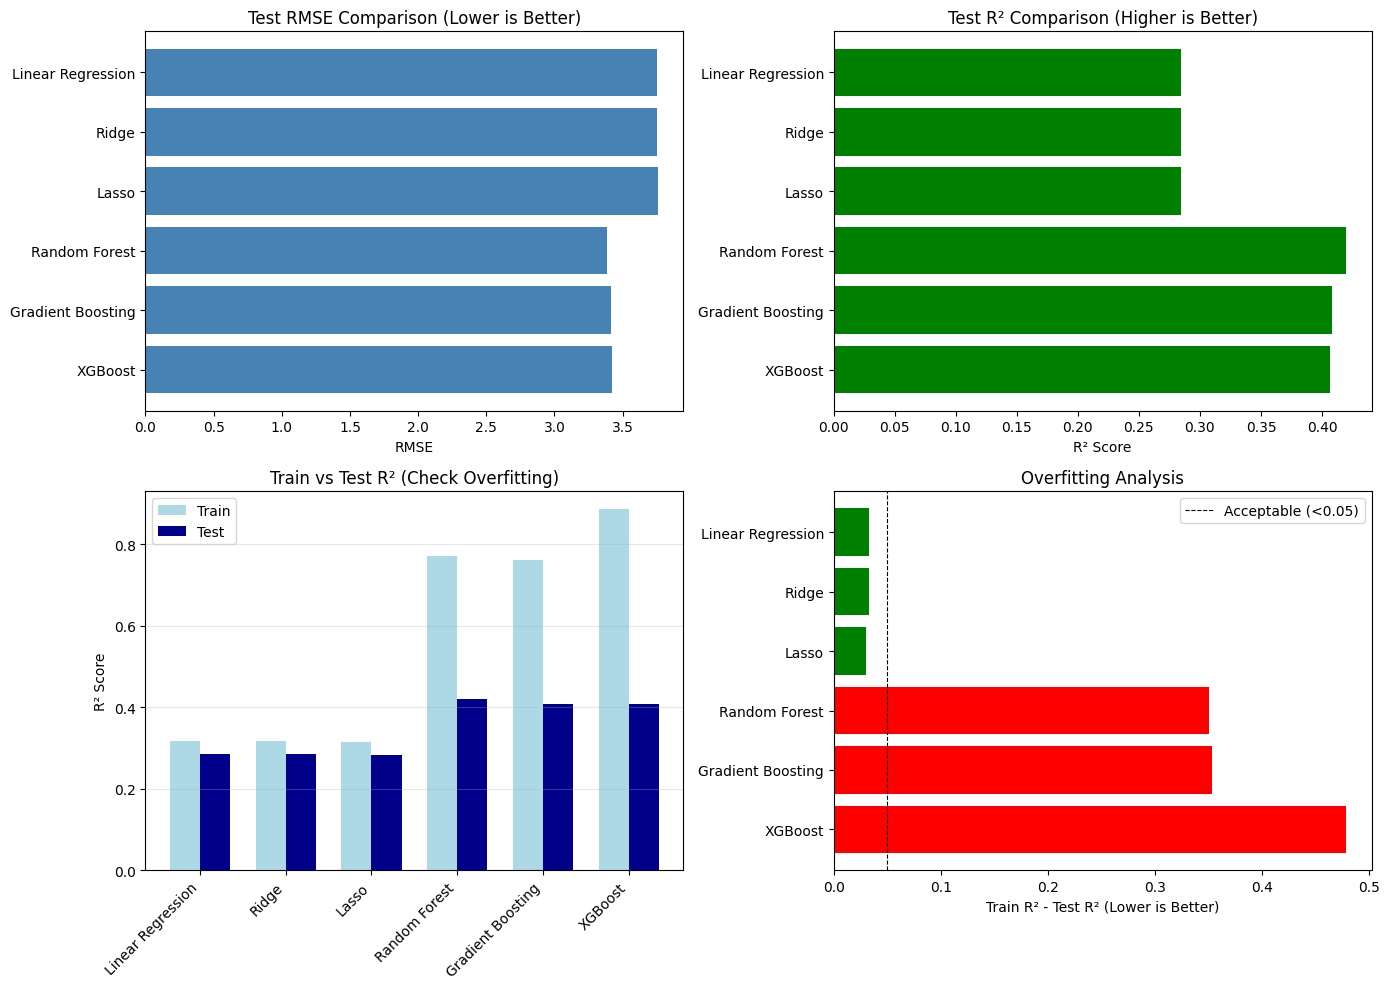

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Test RMSE comparison
axes[0, 0].barh(comparison['Model'], comparison['Test RMSE'], color='steelblue')
axes[0, 0].set_xlabel('RMSE')
axes[0, 0].set_title('Test RMSE Comparison (Lower is Better)')
axes[0, 0].invert_yaxis()

# 2. Test R² comparison
axes[0, 1].barh(comparison['Model'], comparison['Test R²'], color='green')
axes[0, 1].set_xlabel('R² Score')
axes[0, 1].set_title('Test R² Comparison (Higher is Better)')
axes[0, 1].invert_yaxis()

# 3. Train vs Test R²
x_pos = np.arange(len(comparison))
width = 0.35
axes[1, 0].bar(x_pos - width/2, comparison['Train R²'], width, label='Train', color='lightblue')
axes[1, 0].bar(x_pos + width/2, comparison['Test R²'], width, label='Test', color='darkblue')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_title('Train vs Test R² (Check Overfitting)')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(comparison['Model'], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)
# 4. Overfitting gap
axes[1, 1].barh(comparison['Model'], comparison['Overfit Gap'], 
                color=['red' if x > 0.1 else 'orange' if x > 0.05 else 'green' 
                       for x in comparison['Overfit Gap']])
axes[1, 1].set_xlabel('Train R² - Test R² (Lower is Better)')
axes[1, 1].set_title('Overfitting Analysis')
axes[1, 1].axvline(x=0.05, color='black', linestyle='--', linewidth=0.8, label='Acceptable (<0.05)')
axes[1, 1].invert_yaxis()
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [93]:
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['predictions']
# Residuals
residuals = y_test - y_pred_best

print(f"\nResidual Statistics:")
print(f"  Mean: {residuals.mean():.4f} (should be ~0)")
print(f"  Std: {residuals.std():.4f}")
print(f"  Min: {residuals.min():.4f}")
print(f"  Max: {residuals.max():.4f}")


Residual Statistics:
  Mean: 0.0818 (should be ~0)
  Std: 3.3831
  Min: -15.6279
  Max: 13.4574


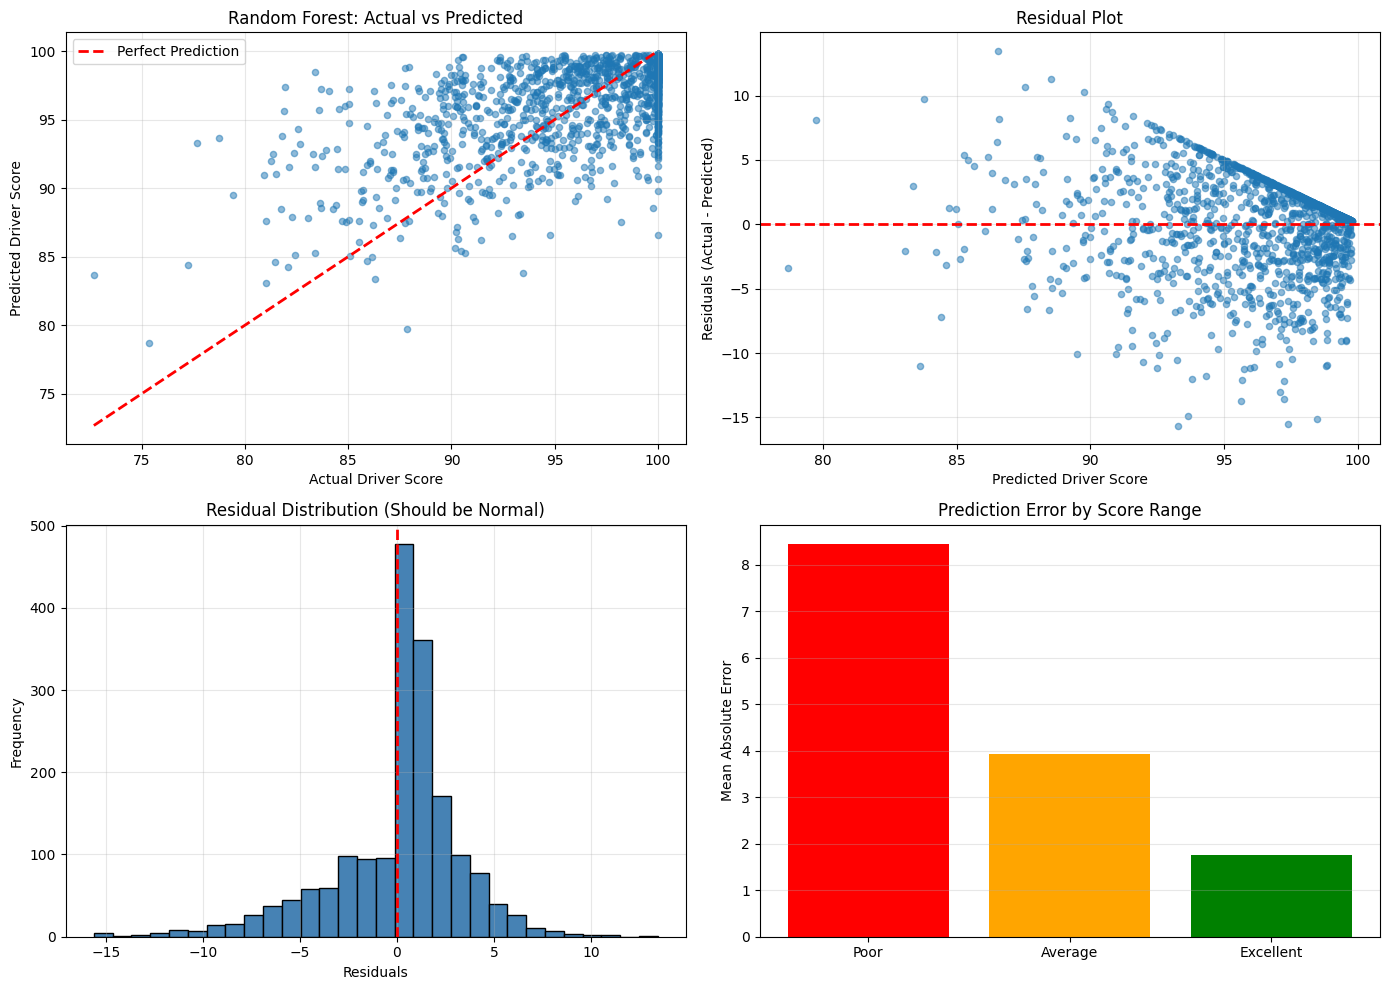

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_best, alpha=0.5, s=20)
axes[0, 0].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Driver Score')
axes[0, 0].set_ylabel('Predicted Driver Score')
axes[0, 0].set_title(f'{best_model_name}: Actual vs Predicted')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Residual plot
axes[0, 1].scatter(y_pred_best, residuals, alpha=0.5, s=20)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Driver Score')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(alpha=0.3)

# 3. Residual distribution
axes[1, 0].hist(residuals, bins=30, edgecolor='black', color='steelblue')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution (Should be Normal)')
axes[1, 0].grid(alpha=0.3)

# 4. Prediction error by score range
score_bins = pd.cut(y_test, bins=[70, 85, 95, 100], labels=['Poor', 'Average', 'Excellent'])
error_by_bin = pd.DataFrame({
    'bin': score_bins,
    'abs_error': np.abs(residuals)
})
error_summary = error_by_bin.groupby('bin')['abs_error'].mean()

axes[1, 1].bar(error_summary.index, error_summary.values, color=['red', 'orange', 'green'])
axes[1, 1].set_ylabel('Mean Absolute Error')
axes[1, 1].set_title('Prediction Error by Score Range')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('best_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()


Top 10 Features:
                feature  importance
          delta_control    0.503168
             accel_mps2    0.110142
          E_actual_kmpl    0.059633
                brake_%    0.032198
speed_brake_interaction    0.020150
              jerk_mps3    0.019630
     speed_rolling_mean    0.019164
      accel_rolling_std    0.018857
         E_desired_kmpl    0.018532
   throttle_rolling_std    0.018417


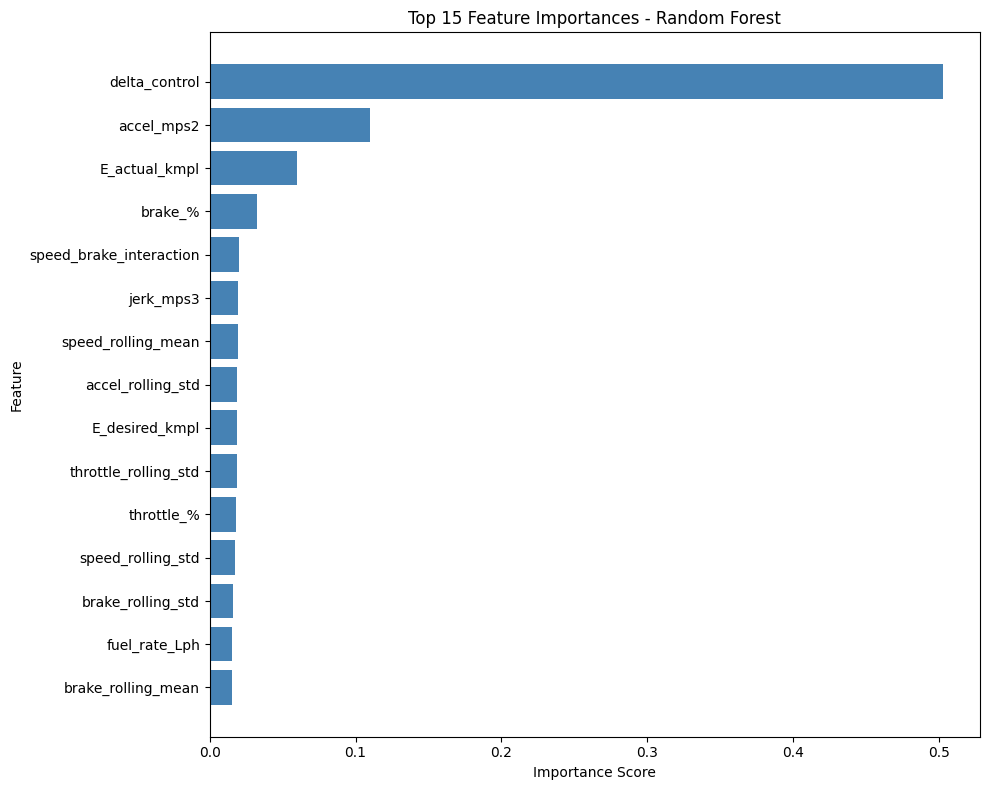

In [113]:
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Features:")
    print(importance_df.head(10).to_string(index=False))
    
    # Plot
    plt.figure(figsize=(10, 8))
    top_15 = importance_df.head(15)
    plt.barh(top_15['feature'], top_15['importance'], color='steelblue')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('best_model_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

In [96]:
import joblib

joblib.dump(best_model, f'{best_model_name.replace(" ", "_").lower()}_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"Best model saved as: {best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"Scaler saved as: scaler.pkl")

Best model saved as: random_forest_model.pkl
Scaler saved as: scaler.pkl


Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.8, 'max_depth': 10}

Performance Metrics:
Train R²: 0.691
Test R² : 0.418
Train RMSE: 2.509
Test RMSE : 3.388
Train MAE: 1.839
Test MAE : 2.420


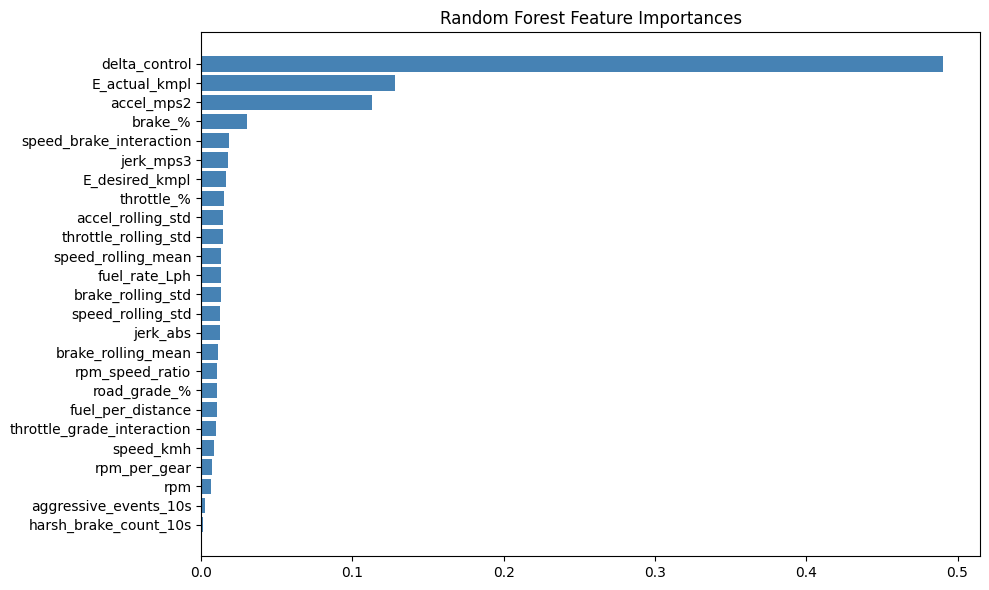


Best model and scaler saved. Ready for deployment!


In [106]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


df = pd.read_csv('driver_data_final.csv')

X = df.drop(columns=['driver_score'])
y = df['driver_score']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.8]
}


search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,          # 30 random combinations, quick but effective
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_scaled, y_train)


best_rf = search.best_estimator_

print("\nBest hyperparameters:")
print(search.best_params_)


y_train_pred = best_rf.predict(X_train_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

print("\nPerformance Metrics:")
print(f"Train R²: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test R² : {r2_score(y_test, y_test_pred):.3f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Test RMSE : {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"Test MAE : {mean_absolute_error(y_test, y_test_pred):.3f}")




importances = best_rf.feature_importances_
feat_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feat_df = feat_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_df['feature'], feat_df['importance'], color='steelblue')
plt.gca().invert_yaxis()
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

joblib.dump(best_rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nBest model and scaler saved. Ready for deployment!")


In [107]:
# Check the feature names used during training
print(scaler.feature_names_in_)


['delta_control' 'accel_mps2' 'E_actual_kmpl' 'brake_%'
 'accel_rolling_std' 'speed_rolling_std' 'throttle_rolling_std'
 'speed_rolling_mean' 'E_desired_kmpl' 'jerk_mps3'
 'speed_brake_interaction' 'throttle_%' 'brake_rolling_std'
 'brake_rolling_mean' 'road_grade_%' 'fuel_per_distance' 'fuel_rate_Lph'
 'rpm_speed_ratio' 'jerk_abs' 'throttle_grade_interaction' 'speed_kmh'
 'rpm_per_gear' 'rpm' 'aggressive_events_10s' 'harsh_brake_count_10s']
